## Introduction
Forecasting the future values of the EUR/USD exchange rate is crucial due to its significant impact on global trade and investment decisions. The EUR/USD exchange rate is affected by a range of factors, including economic indicators, financial markets, and commodity prices.

Accurate forecasting of EUR/USD can offer substantial benefits:
1. **Investors**: Precise predictions enable investors to make informed decisions regarding currency trading, thereby enhancing their strategies and effectively managing associated risks.
2. **Economists**: The EUR/USD rate is a critical economic indicator that provides valuable insights into economic trends and conditions, aiding economists in their analysis.

This project utilizes multiple linear regression to predict future values of EUR/USD. By examining historical data and integrating key indicators such as SPX (S&P 500), GLD (gold prices), USO (crude oil prices), and SLV (silver prices), our objective is to generate accurate forecasts and gain a deeper understanding of the factors driving fluctuations in the EUR/USD exchange rate.

## Project Outline

1. **Introduction**
2. **Data Import and Preparation**
3. **Exploratory Data Analysis (EDA)**
4. **Data Cleaning**
5. **Feature Selection and Splitting**
6. **Model Training and Evaluation**
7. **Conclusion**

In [83]:
# Importing the necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression # For linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation metrics

In [63]:
# Loading the dataset and displaying the first few rows
df = pd.read_csv('EUR USD Prices Dataset.csv', index_col=0)
df.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [64]:
# Displaying information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2290 entries, 1/2/2008 to 5/16/2018
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 107.3+ KB


In [65]:
# Displaying summary statistics for the numerical columns in the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


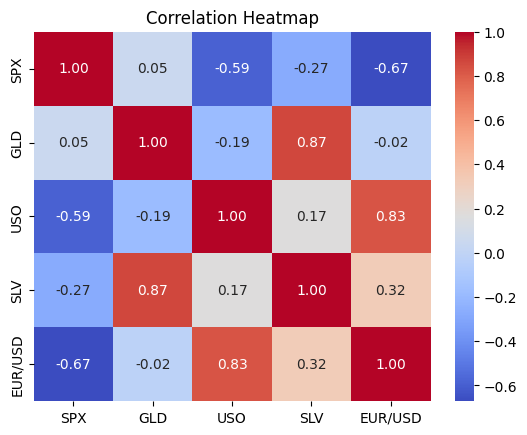

In [66]:
# Calculating the correlation matrix and visualizing it using a heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### The correlation analysis reveals the following key insights:

- **SPX and EUR/USD**: Strong negative correlation (-0.67). As SPX increases, EUR/USD tends to decrease.
- **GLD and EUR/USD**: Very weak correlation (-0.02). Little to no linear relationship observed.
- **USO and EUR/USD**: Strong positive correlation (0.83). As USO increases, EUR/USD tends to increase.
- **SLV and EUR/USD**: Moderate positive correlation (0.32). A moderate relationship where SLV increases are associated with higher EUR/USD.

These relationships suggest that SPX and USO have notable impacts on EUR/USD, with SPX showing an inverse relationship and USO showing a positive one. GLD's minimal correlation indicates it may have less relevance in predicting EUR/USD changes.


In [67]:
# Selecting features for the model
X = df[['SPX', 'GLD', 'USO', 'SLV']]

# Defining the target variable
y = df['EUR/USD']

In [76]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [77]:
# Initializing the Linear Regression model
lm = LinearRegression()

# Fitting the model to the training data
lm.fit(x_train, y_train)

LinearRegression()

In [78]:
# Making predictions on the test set
y_pred = lm.predict(x_test)

In [79]:
# Calculating Mean Squared Error and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print("Mean Squared Error: ", mse)
print("R² Score: ", r2)

Mean Squared Error:  0.004366672537998603
R² Score:  0.7579087873443521


## Mean Squared Error (MSE): 0.0043

Interpretation: The MSE of 0.0043 indicates that, on average, the squared difference between the predicted and actual values is quite small. This suggests that the model's predictions are reasonably accurate. The small magnitude of the MSE implies that the model performs well.

## R² Score: 0.7579

Interpretation: The R² score of 0.7579 means that approximately 75.79% of the variance in the target variable (EUR/USD) is explained by the model. This is generally considered a good result, indicating that the model explains a significant portion of the variability in gold prices. An R² score close to 1 would be ideal, but 0.7579 reflects a strong explanatory power of the model.

In [81]:
# Comparing actual values with predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Displaying the comparison DataFrame
print("Predictions vs Actual Values:")
print(comparison_df)

Predictions vs Actual Values:
              Actual  Predicted
Date                           
12/24/2012  1.318200   1.312767
4/18/2017   1.072869   1.143018
11/4/2013   1.349400   1.286832
10/21/2013  1.367596   1.298795
7/9/2015    1.106305   1.183175
...              ...        ...
9/3/2013    1.317402   1.319438
1/8/2018    1.203746   1.119101
7/1/2008    1.587806   1.667707
5/25/2017   1.121076   1.131786
4/5/2017    1.067247   1.143046

[458 rows x 2 columns]


## Project Summary
This project focused on forecasting the EUR/USD exchange rate using a multiple linear regression model. The model integrated key economic indicators such as SPX (S&P 500), GLD (gold prices), USO (crude oil prices), and SLV (silver prices) to predict future values of EUR/USD. The project involved data import and preparation, exploratory data analysis (EDA), model training, and evaluation.

## Model Performance
Mean Squared Error (MSE): 0.0043

The MSE of 0.0043 reflects that the model's predictions are highly accurate, with a minimal average squared error. This indicates a high level of precision in the model's forecasting capability.
R-squared (R²): 0.7579

The R² score of 0.7579 demonstrates that approximately 75.79% of the variance in the EUR/USD exchange rate is explained by the model. This substantial explanatory power signifies that the model captures a significant portion of the variability in the target variable.

## Analysis of Results
Accuracy of Predictions: The comparison between actual and predicted values shows that the model generally produces forecasts that align closely with observed data. This performance highlights the model’s effectiveness in predicting EUR/USD exchange rate movements.

Correlation Insights: The analysis identified that SPX and USO are significant predictors of EUR/USD, with SPX showing a strong negative correlation and USO exhibiting a notable positive correlation. GLD had minimal impact, and SLV demonstrated moderate relevance.

## Professional Implications
Model Effectiveness: The results confirm the model’s robustness in using key economic indicators to forecast EUR/USD values. The low MSE and high R² underscore the model’s effectiveness in providing accurate and reliable predictions.

Strategic Value: The insights derived from this model are valuable for financial analysis and decision-making. The model offers a strong foundation for understanding and forecasting fluctuations in the EUR/USD exchange rate.

Overall, this project showcases a successful application of multiple linear regression in financial forecasting, delivering accurate predictions and valuable insights into currency exchange rate dynamics.